In [36]:
library ('tidyverse')
library ('readxl')
library('haven')

In [7]:
df_crash = read_excel ("pbtype21.xlsx")
df_crash |> head()

STATE,STATENAME,ST_CASE,VEH_NO,PER_NO,PBAGE,PBAGENAME,PBSEX,PBSEXNAME,PBPTYPE,⋯,MOTMAN,MOTMANNAME,PEDLEG,PEDLEGNAME,PEDSNR,PEDSNRNAME,PEDCGP,PEDCGPNAME,BIKECGP,BIKECGPNAME
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,Alabama,10003,0,1,32,32 Years,1,Male,5,⋯,8,Not Applicable,8,Not Applicable,8,Not Applicable,400,Walking/Running Along Roadway,0,Not a Cyclist
1,Alabama,10014,0,1,19,19 Years,1,Male,5,⋯,8,Not Applicable,8,Not Applicable,8,Not Applicable,750,Crossing Roadway - Vehicle Not Turning,0,Not a Cyclist
1,Alabama,10015,0,1,53,53 Years,2,Female,5,⋯,8,Not Applicable,8,Not Applicable,8,Not Applicable,990,Other / Unknown - Insufficient Details,0,Not a Cyclist
1,Alabama,10018,0,1,81,81 Years,1,Male,5,⋯,8,Not Applicable,8,Not Applicable,8,Not Applicable,750,Crossing Roadway - Vehicle Not Turning,0,Not a Cyclist
1,Alabama,10022,0,1,54,54 Years,1,Male,5,⋯,3,Straight through,2,Farside,3b,"Motorist traveling straight through - Crash Occurred on Far Side of Intersection / Pedestrian within crosswalk area, traveled from motoristís right.",750,Crossing Roadway - Vehicle Not Turning,0,Not a Cyclist
1,Alabama,10042,0,1,60,60 Years,1,Male,5,⋯,8,Not Applicable,8,Not Applicable,8,Not Applicable,100,Unusual Circumstances,0,Not a Cyclist


In [28]:
df_nc_crash= df_crash|>
    filter(STATENAME == "North Carolina")

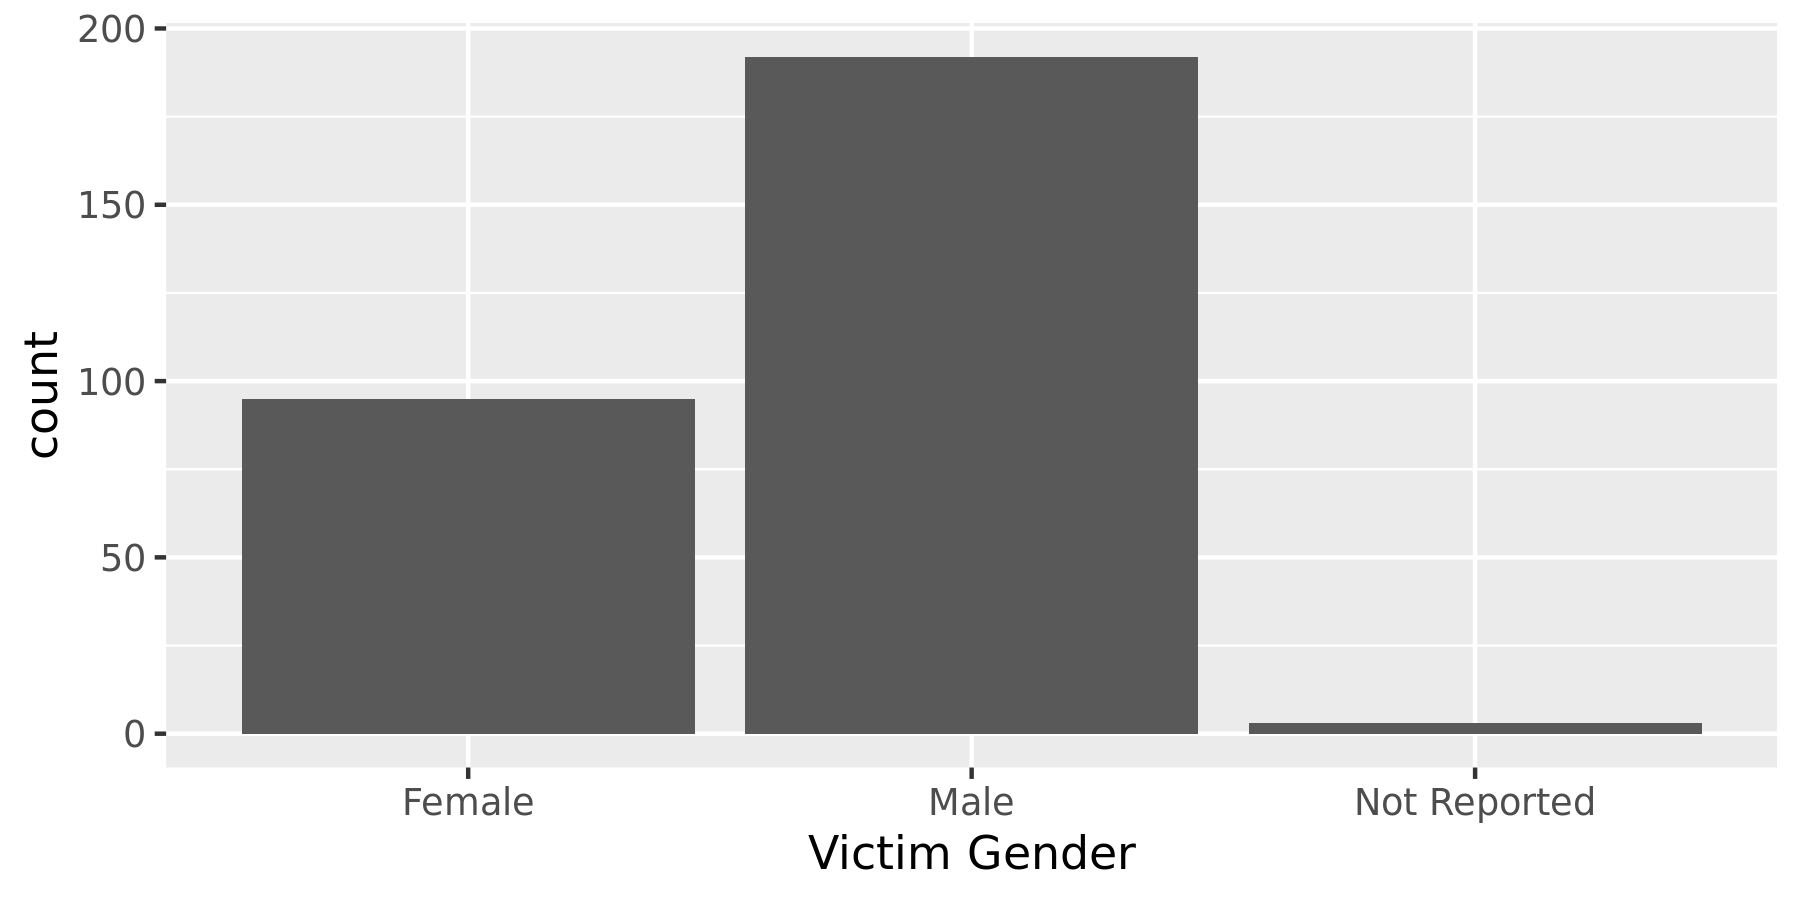

In [27]:
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(df_nc_crash, aes(x = PBSEXNAME)) +
    geom_bar() +
    #facet_wrap (~PBSEXNAME) +
    xlab('Carsh-victims Gender in NC') +
    theme(legend.title = element_blank()) +
    scale_color_brewer(palette = 'Dark2')

p

In [38]:
df_RCT = read_sas("actg175.sas7bdat")
df_RCT|> head()

pidnum,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,⋯,offtrt,cd40,cd420,cd496,r,cd80,cd820,cens,days,arms
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10056,48,89.8128,0,0,0,100,0,0,1,⋯,0,422,477,660,1,566,324,0,948,2
10059,61,49.4424,0,0,0,90,0,1,1,⋯,0,162,218,NA,0,392,564,1,1002,3
10089,45,88.4520,0,1,1,90,0,1,1,⋯,1,326,274,122,1,2063,1893,0,961,3
10093,47,85.2768,0,1,0,100,0,1,1,⋯,0,287,394,NA,0,1590,966,0,1166,3
10124,43,66.6792,0,1,0,100,0,1,1,⋯,0,504,353,660,1,870,782,0,1090,0
10140,46,88.9056,0,1,1,100,0,1,1,⋯,0,235,339,264,1,860,1060,0,1181,1


In [41]:
df_RCT$arms <- as.factor(df_RCT$arms)

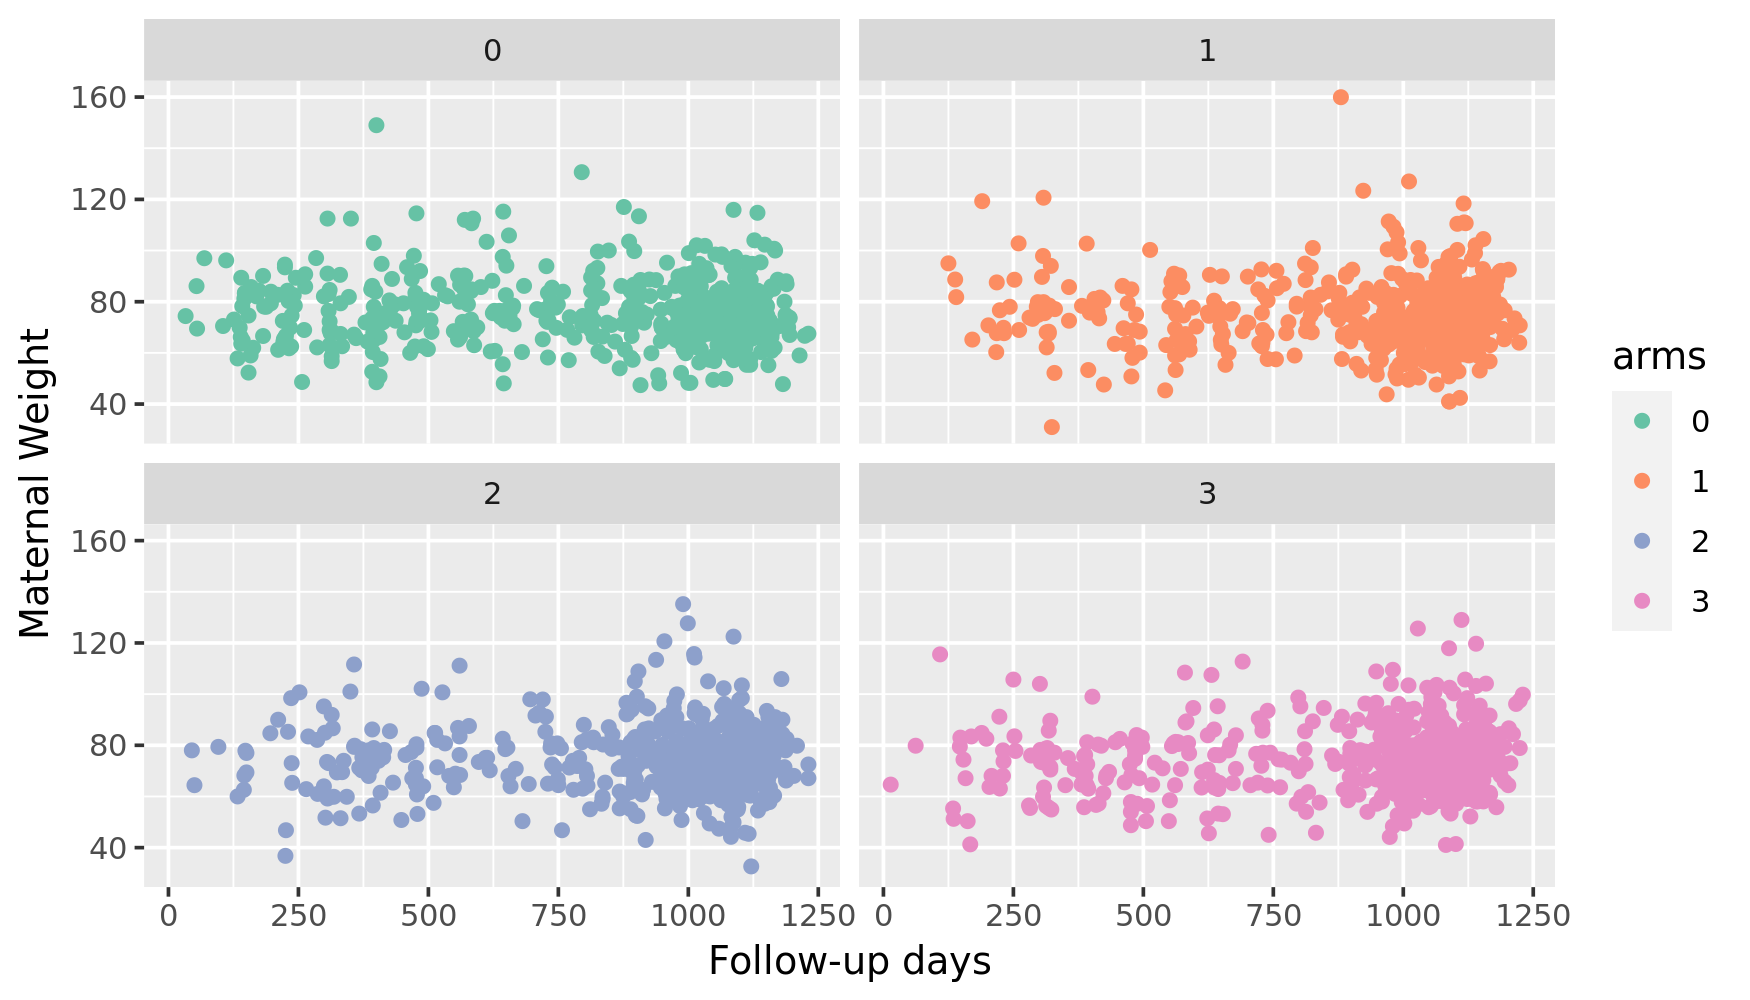

In [57]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 250)

p = ggplot(
    data = df_RCT,
    mapping = aes(y = wtkg, x = days, color = arms)
)

p = p + geom_point() + scale_color_brewer(palette = "Set2") + facet_wrap (~arms) +  xlab('Follow-up days') + ylab('Maternal Weight')

p

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 797 rows containing non-finite values (`stat_smooth()`).”


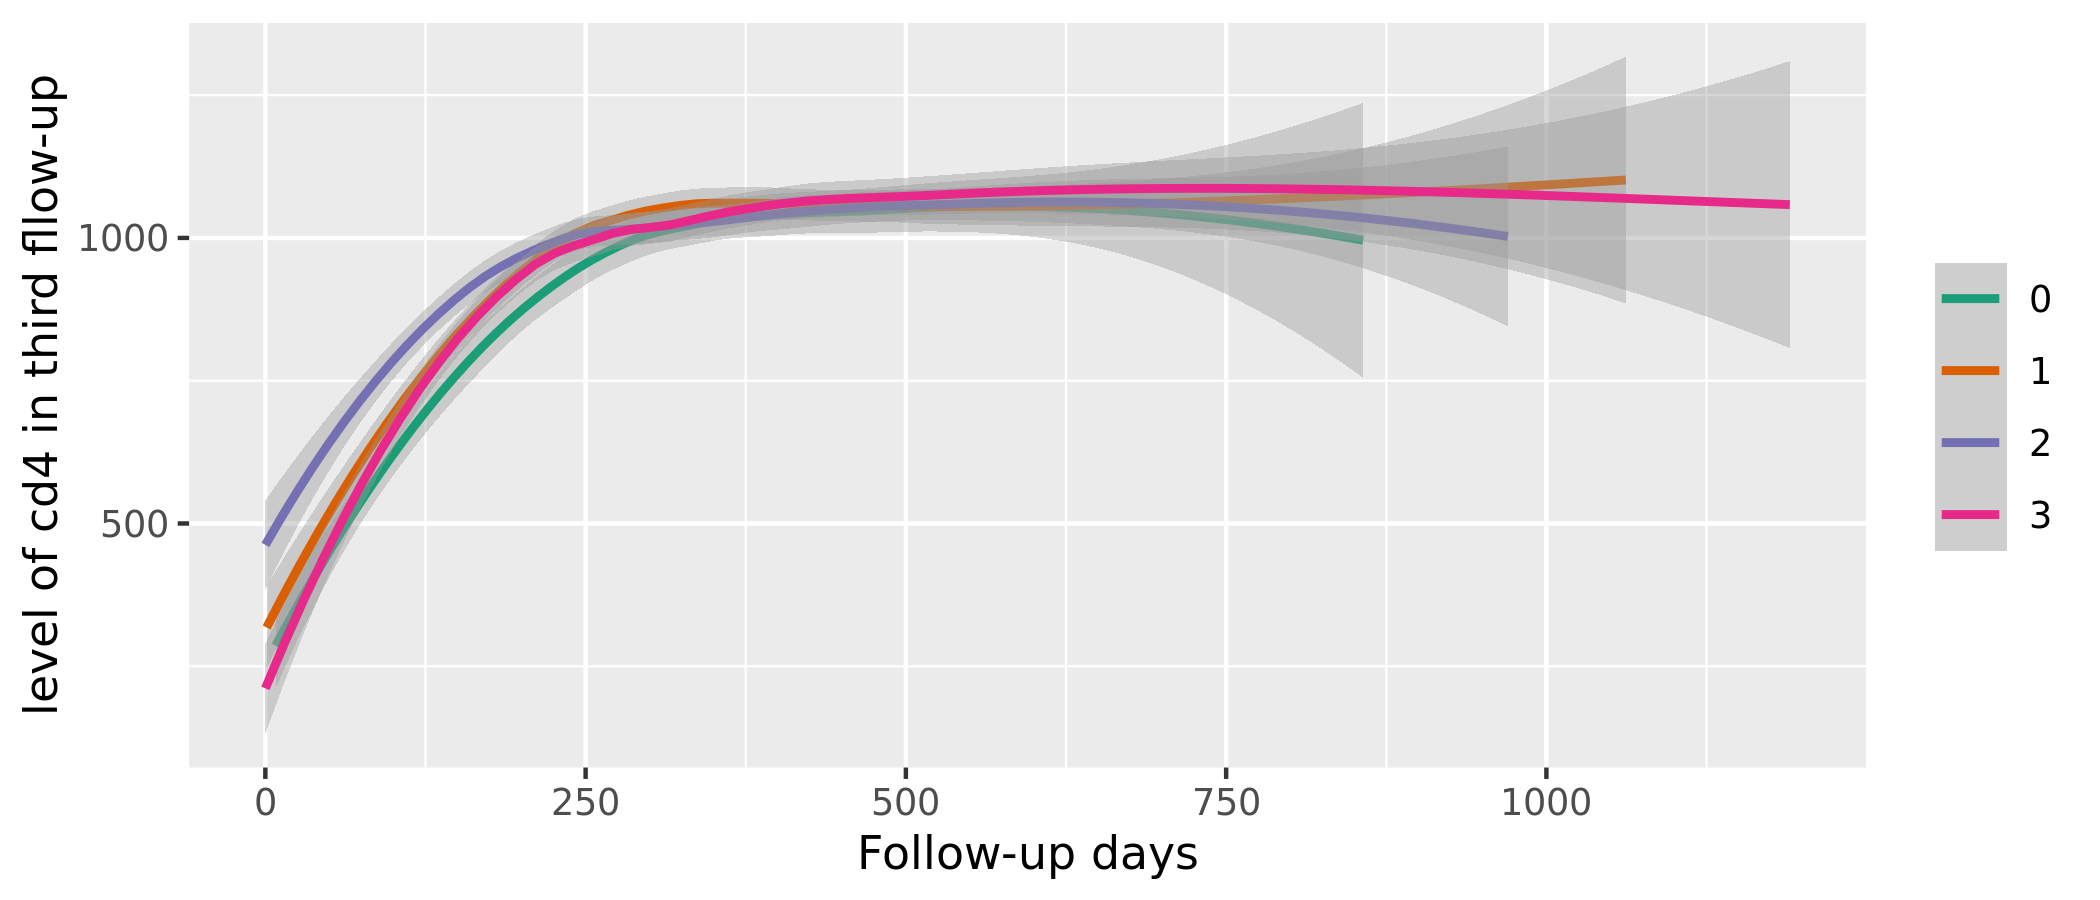

In [55]:
options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(df_RCT, aes(x = cd496, y = days,  color = arms)) +
    geom_smooth() +
    xlab('Follow-up days') + ylab('level of cd4 in third fllow-up') +
    theme(legend.title = element_blank()) +
    scale_color_brewer(palette = 'Dark2')

p